## Списки

Вам дан список. Создайте новый список, в котором порядок следования элементов будет обратным относительно исходного списка. 

In [222]:
a = [1, 2, 3, 4, 5]
b = a[::-1]
b

[5, 4, 3, 2, 1]

Вам дан список. Создайте новый список, в котором будут присутствовать только чётные элементы исходного списка.

In [223]:
a = list(range(20))
b = [i for i in a if not i % 2]
b

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## Генераторы

Вам дан список. Создайте новый список, который удвоит каждый элемент исходного списка.

In [224]:
a = list(range(20))
b = [i * 2 for i in a]
b

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

Вам дан список. Создайте новый список, который умножит увеличит на треть элемент исходного списка.

In [225]:
a = list(range(20))
b = [i * 0.3 for i in a]
b

[0.0,
 0.3,
 0.6,
 0.8999999999999999,
 1.2,
 1.5,
 1.7999999999999998,
 2.1,
 2.4,
 2.6999999999999997,
 3.0,
 3.3,
 3.5999999999999996,
 3.9,
 4.2,
 4.5,
 4.8,
 5.1,
 5.3999999999999995,
 5.7]

## Встроенные функции

Вам дана строка. Выведите ascii-код максимального элемента в строке. 

In [226]:
s = 'abacaba'
a = [ord(i) for i in s]
max(a)

99

Вам дана строка. Преобразуйте её в кортежи, состоящие из пары – порядковый номер элемента строки, ascii-код элемента.

In [227]:
lst = [(i, j) for i, j in enumerate(a)]
lst

[(0, 97), (1, 98), (2, 97), (3, 99), (4, 97), (5, 98), (6, 97)]

## NumPy

Создайте многомерный массив, посчитайте суммы элементов по различным осям.

In [228]:
import numpy as np

a = np.array([[100, 200, 300, 400],
                [213, 24124, 1231, 123],
                [0, 0, 0, 0],
                [1, 2, 3, 4],
                [5, 4, 3, 2]])

print("Sum along axis 0", a.sum(axis=0))
print("Sum along axis 1", a.sum(axis=1))
print("Sum along all", np.apply_over_axes(np.sum, a, range(a.ndim - 1)))

Sum along axis 0 [  319 24330  1537   529]
Sum along axis 1 [ 1000 25691     0    10    14]
Sum along all [[  319 24330  1537   529]]


Дан массив A (numpy.array()), заполненный 1.
Дан массив I (numpy.array()) индексов.

Прибавьте к каждому значению массиву A по массиву индексов +1.

In [229]:
import numpy as np

n = 10
k = 12
A = np.ones(n)
I = np.random.randint(0,len(A),k)
A += np.bincount(I)
A

array([2., 3., 3., 2., 2., 2., 1., 3., 1., 3.])

## Pandas

https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте гистаграмму переменной `Target`.
- Постройте heatmap для матрицы корреляции переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных классов *(т.е. отдельно какие показатели у класса 0, какие у класса 1)*.
- Проанализируйте колонку `SpType`. Подсчитаете количество звёзд относящихся к различным классам.
`SpType` - спектральный класс звезды согласно классификации Моргана-Кинана.

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

df = pd.read_csv("Star3642_balanced.csv")

In [231]:
!pip install -q kaleido

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [233]:
df.dtypes

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object

In [234]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

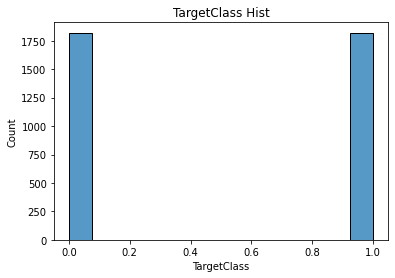

In [235]:
sns.histplot(data=df, x="TargetClass");
plt.title("TargetClass Hist");

Balanced :)

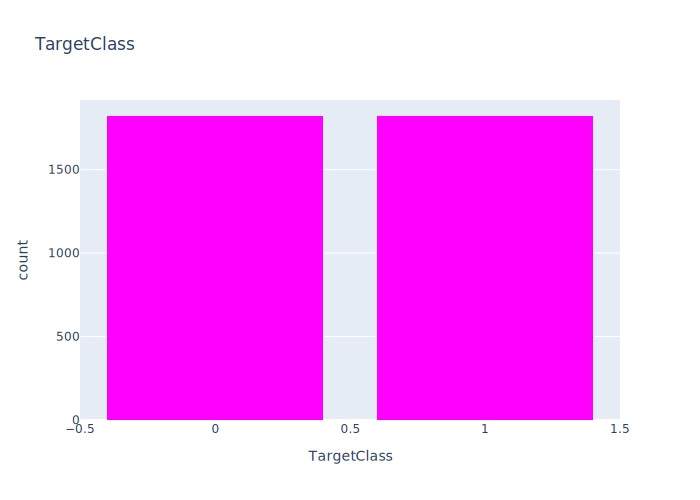

In [236]:
fig = px.histogram(
    df, x="TargetClass",
    title="TargetClass",
    color_discrete_sequence=['magenta'],
)

fig.update_layout(bargap=0.2)

fig.show(renderer='svg');
# fig.show()

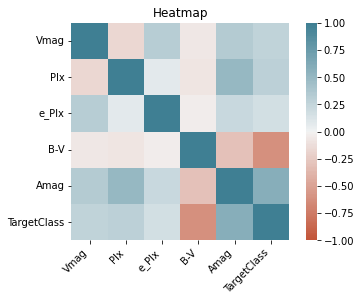

In [237]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title("Heatmap");

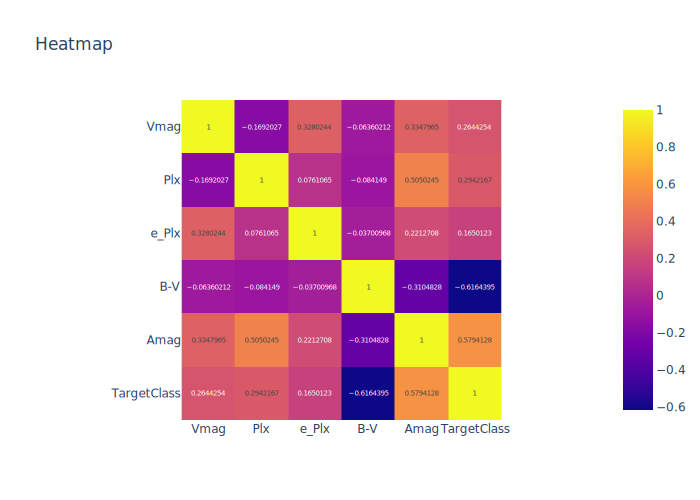

In [238]:
fig = px.imshow(corr, text_auto=True, title="Heatmap")
fig.show(renderer='svg');
# fig.show();

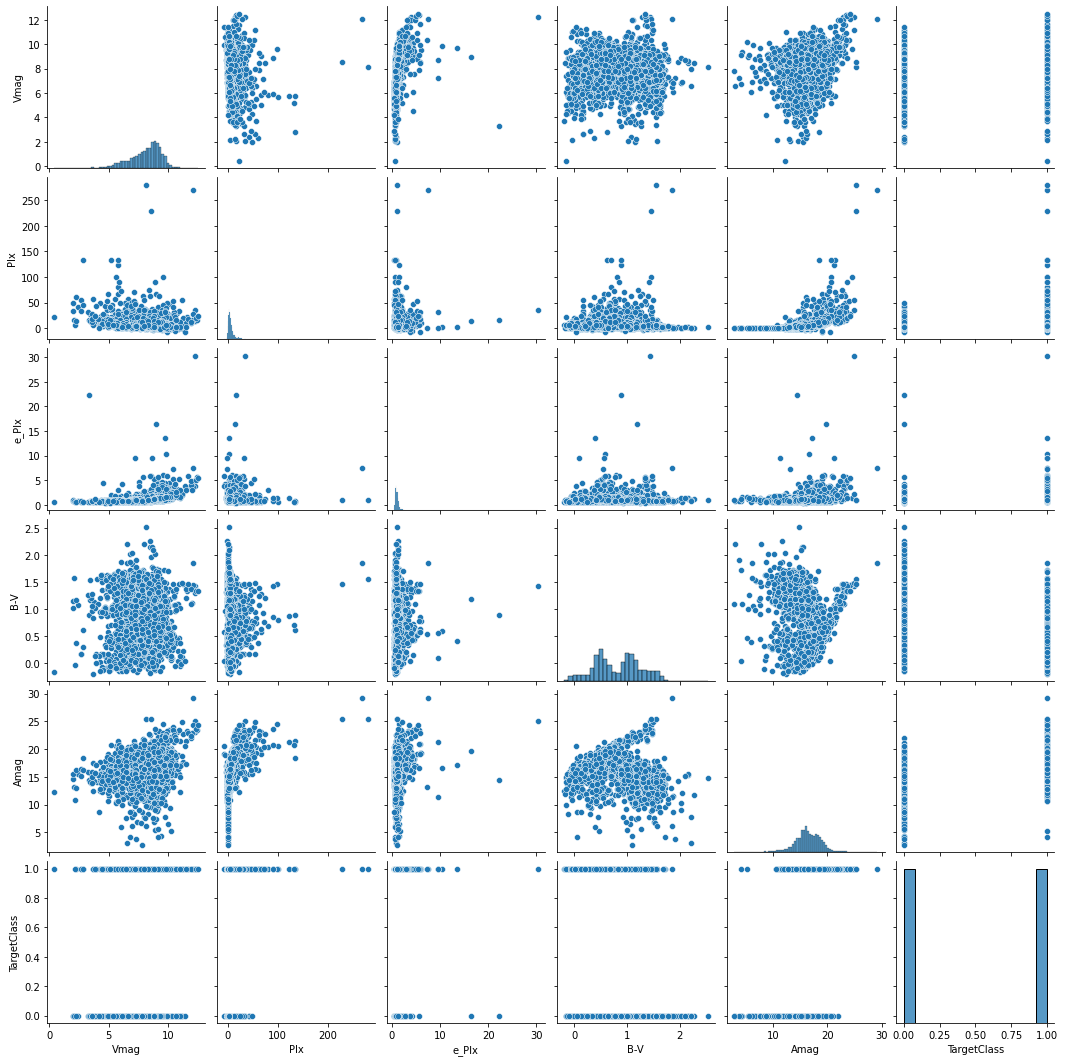

In [239]:
fig = sns.pairplot(df);

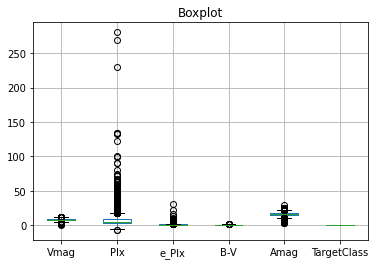

In [240]:
fig = df.boxplot(column=['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'TargetClass'])
plt.title("Boxplot");

In [241]:
df.loc[(df.Plx > 120) | (df.e_Plx > 20)]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
507,12.23,35.36,30.29,1.436,K7V:,24.972560,1
819,5.76,122.75,1.41,0.880,K0V,21.205109,1
844,12.10,269.05,7.57,1.850,M5.5Ve,29.249165,1
1192,2.82,133.78,0.51,0.618,G2IV,18.451956,1
1355,3.32,16.46,22.22,0.885,G8IIIvar,14.402148,0
2107,5.74,134.04,0.86,0.890,K2V,21.376171,1
2910,5.17,132.40,0.60,0.704,G5Vp,20.779440,1
3428,8.09,280.27,1.05,1.560,M1V,25.327883,1
3455,8.56,229.33,1.08,1.462,M2V,25.362305,1


In [242]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [243]:
df[df.TargetClass == 1].describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.0
mean,8.474514,11.113926,1.328358,0.557915,17.834092,1.0
std,1.303624,15.609759,1.075714,0.295059,1.961758,0.0
min,0.450000,-6.820000,0.490000,-0.196000,4.140000,1.0
25%,7.880000,4.720000,0.920000,0.417000,16.797817,1.0
50%,8.750000,7.590000,1.150000,0.526000,17.947254,1.0
75%,9.340000,12.500000,1.410000,0.677000,18.903980,1.0
max,12.490000,280.270000,30.290000,1.850000,29.249165,1.0


In [244]:
df[df.TargetClass == 0].describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.0
mean,7.766546,4.098380,1.024778,1.096238,15.020683,0.0
std,1.279053,4.019592,0.699996,0.386628,1.996673,0.0
min,2.010000,-6.630000,0.470000,-0.154000,2.820000,0.0
25%,7.010000,1.860000,0.810000,0.975000,14.279716,0.0
50%,7.990000,3.250000,0.940000,1.109000,15.396389,0.0
75%,8.720000,5.240000,1.140000,1.337000,16.158733,0.0
max,11.420000,49.480000,22.220000,2.530000,21.997383,0.0


In [245]:
df.SpType.value_counts()

K0III          293
K1III          200
K2III          156
G8III          135
F5V            125
              ... 
B9.5IV           1
B0Ibp            1
M0V              1
B1Vv SB          1
M0/M1IIICNp      1
Name: SpType, Length: 584, dtype: int64

In [246]:
df.SpType.value_counts().nlargest(10)

K0III    293
K1III    200
K2III    156
G8III    135
F5V      125
K3III    103
F3V       93
F6V       80
F7V       77
G3V       69
Name: SpType, dtype: int64

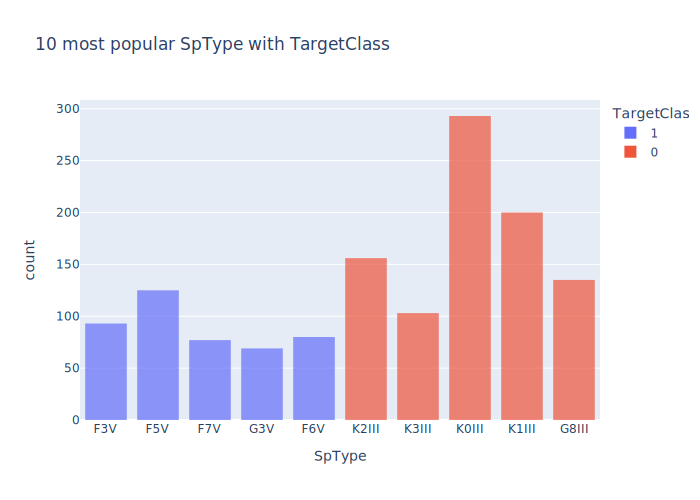

In [247]:
stars = df.SpType.value_counts().nlargest(10).index
df_tmp = df[df["SpType"].isin(stars)].copy()

fig = px.histogram(
    df_tmp,
    x="SpType",
    color="TargetClass",
    opacity=0.7,
    title="10 most popular SpType with TargetClass",
)

fig.show(renderer='svg')
# fig.show();

In [248]:
df["Stellar Letter"] = df["SpType"].apply(lambda x: x[0])

In [249]:
print(df["Stellar Letter"].unique())

['K' 'B' 'G' 'F' 'M' 'A' 'O' 'C']


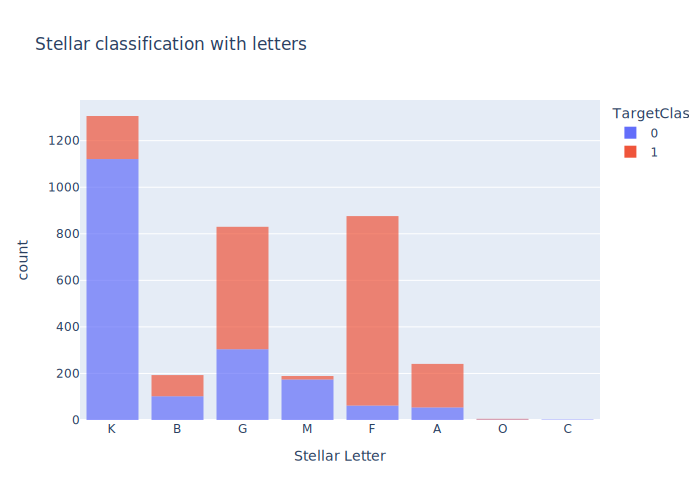

In [250]:
fig = px.histogram(
    df,
    x="Stellar Letter",
    color="TargetClass",
    opacity=0.7,
    title="Stellar classification with letters",
)

fig.show(renderer='svg');

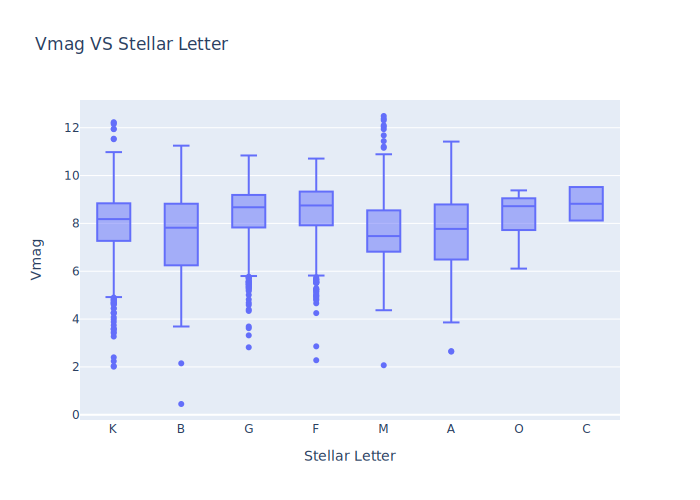

In [251]:
fig = px.box(
    df,
    x="Stellar Letter",
    y="Vmag",
    title="Vmag VS Stellar Letter",
)

fig.show(renderer='svg')

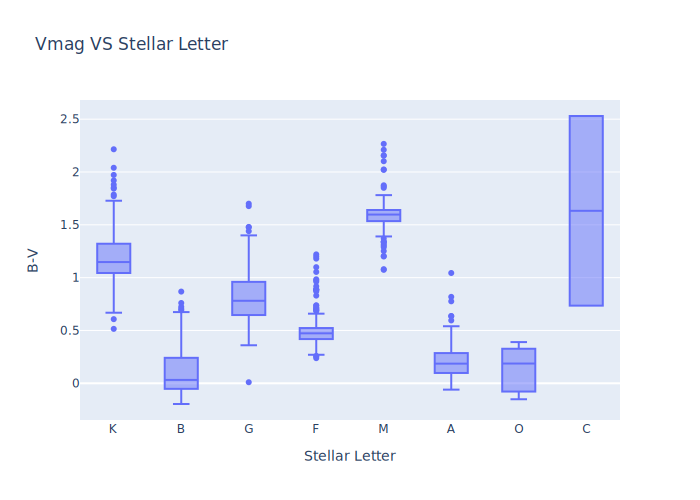

In [252]:
fig = px.box(
    df,
    x="Stellar Letter",
    y="B-V",
    title="Vmag VS Stellar Letter",
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})

fig.show(renderer='svg')

In [253]:
df["Stellar Number"] = df["SpType"].apply(lambda x: x[1])

In [254]:
df["Stellar Number"].unique()

array(['5', '1', '7', '0', '9', '3', '2', '4', '8', '6', 'I', ':'],
      dtype=object)

In [255]:
strange = df[df.SpType.str[1] == ':']

In [256]:
strange

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,Stellar Letter,Stellar Number
857,9.5,5.59,1.5,0.493,G:III/IV+..,18.23706,1,G,:


In [257]:
strange = df[df.SpType.str[1] == 'I']

In [258]:
strange

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,Stellar Letter,Stellar Number
111,9.29,3.85,1.32,0.588,GIII:+...,17.217304,0,G,I
1908,7.70,3.29,0.98,1.467,MIII,15.285979,0,M,I


In [259]:
df1 = df.loc[(df.SpType.str[1] != ':') & (df.SpType.str[1] != 'I')].copy()

: и I - неточность в определении спектра

In [260]:
df1["Stellar Number"] = df1["Stellar Number"].astype(int)


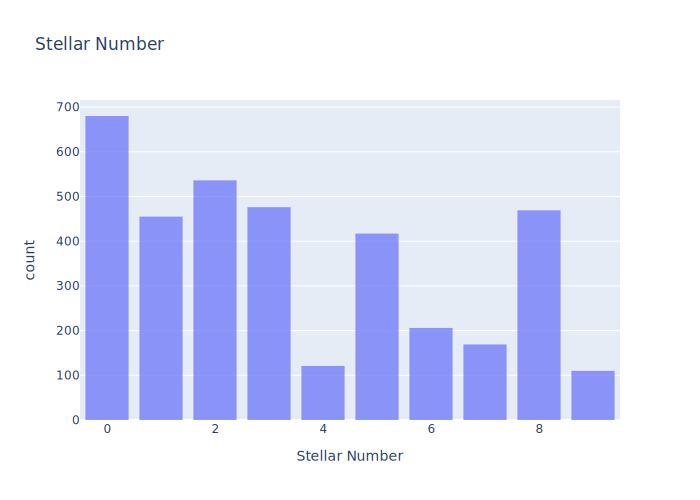

In [261]:
fig = px.histogram(
    df1,
    x="Stellar Number",
    opacity=0.7,
    title="Stellar Number",
)


fig.update_layout(xaxis={'categoryorder': 'total ascending'}, bargap=0.2)
fig.show(renderer='svg');

In [262]:
df1.groupby(["Stellar Letter"]).mean()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Stellar Number
Stellar Letter,,,,,,,
A,7.649710,6.788340,1.115187,0.201444,16.072043,0.775934,4.037344
B,7.539430,2.797979,1.030933,0.117523,14.112055,0.471503,5.766839
C,8.820000,6.210000,1.065000,1.632500,17.180022,0.000000,5.500000
F,8.496632,8.722123,1.248105,0.477695,17.628268,0.929224,4.285388
G,8.364614,9.349457,1.281425,0.809902,17.308375,0.634058,5.224638
K,7.954862,6.529035,1.097672,1.183778,15.749701,0.141654,1.613323
M,7.620957,8.443564,1.154415,1.592654,14.587200,0.079787,1.898936
O,8.282000,0.844000,1.290000,0.135600,12.251208,0.600000,8.800000


neb - спектр дополнен спектром туманности

In [263]:
df1[df1.SpType.str.contains('neb')]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,Stellar Letter,Stellar Number


Таких звезд нет, спектр остальных звезд определен точно

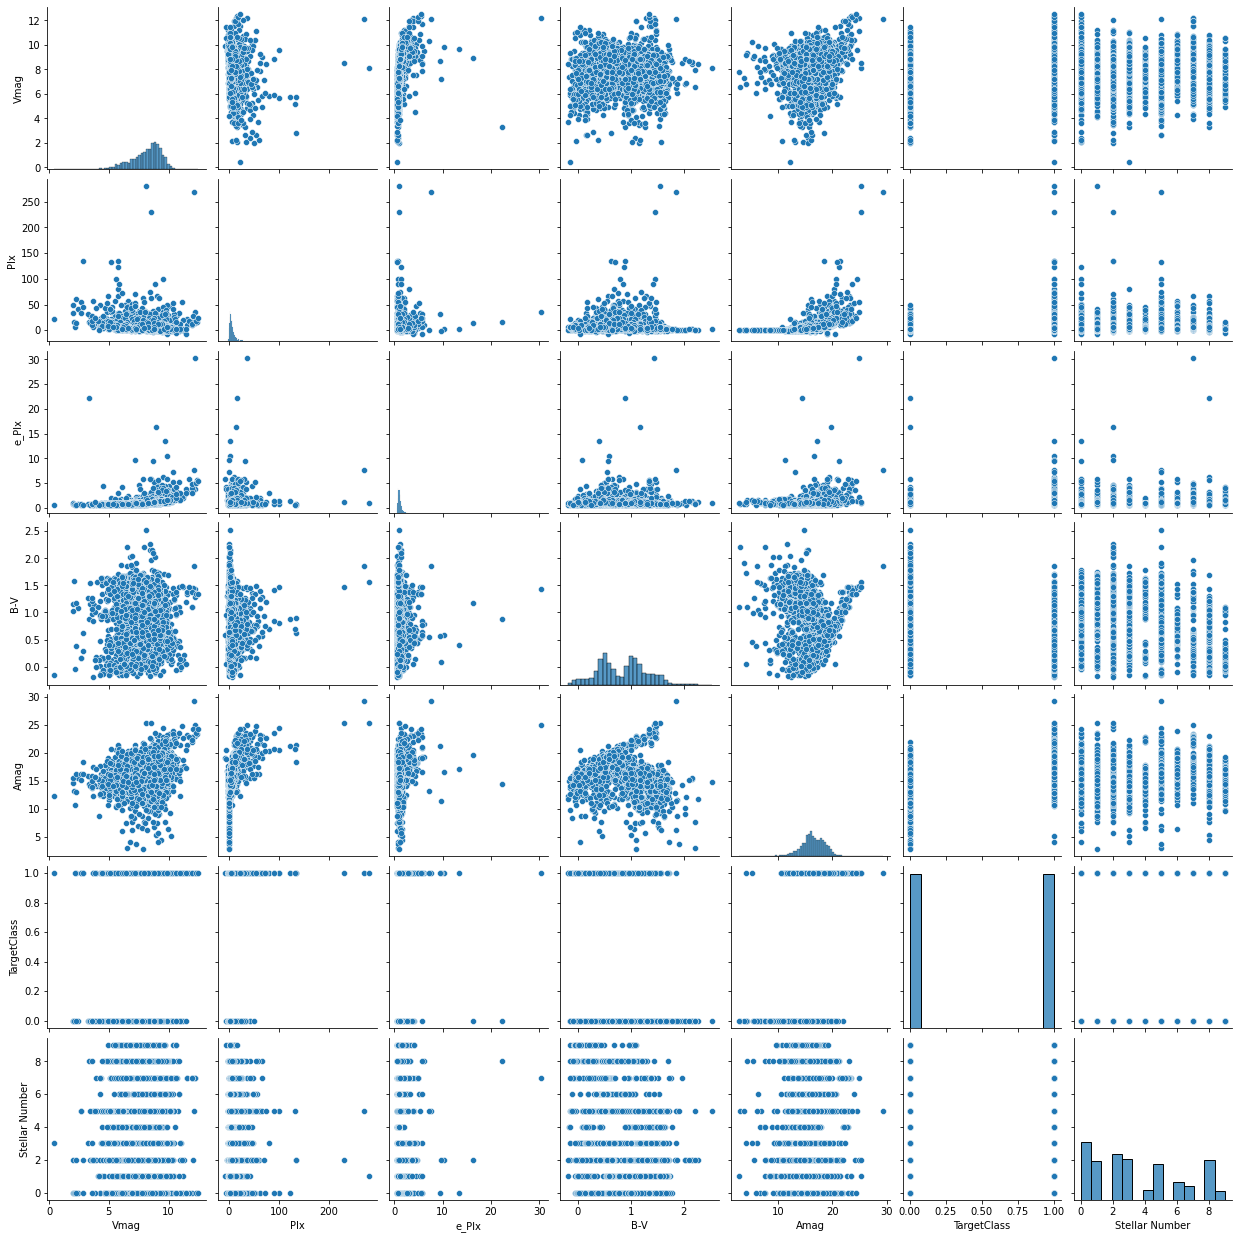

In [264]:
fig = sns.pairplot(df1);

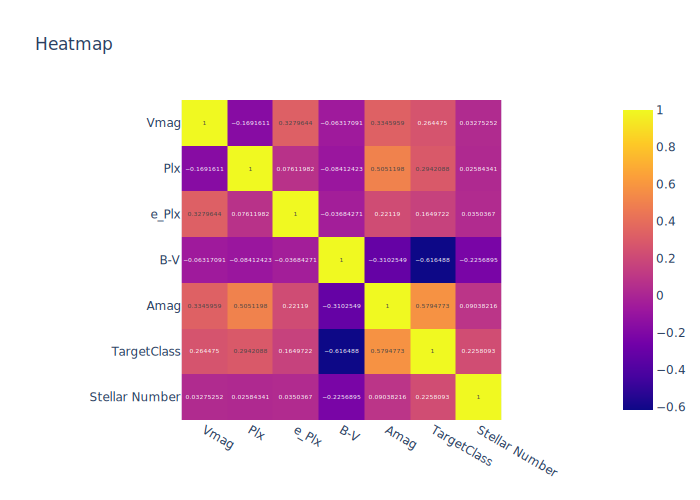

In [265]:
corr = df1.corr()
fig = px.imshow(corr, text_auto=True, title="Heatmap")
fig.show(renderer="svg");

In [266]:
spectrum_classes ={
    "I": "сверхгигант", 
    "II": "яркий гигант",
    "III": "гигант",
    "IV": "субгигант",
    "V": "главная последовательность", 
    "VI": "субкарлик", 
    "VII": "белый карлик"
}

In [267]:
def process_string(s):
  tmp = ''.join([c for c in s if c in ["I", "V"]])
  try:
    return spectrum_classes[tmp]
  except:
    return 'No class'

In [268]:
df1["Size"] = df1["SpType"].apply(lambda x: process_string(x))

In [269]:
df1.Size.value_counts()

гигант                        1638
главная последовательность    1384
No class                       270
субгигант                      206
сверхгигант                     78
яркий гигант                    63
Name: Size, dtype: int64

In [271]:
fig = px.histogram(
    df1,
    x="Size",
    color="TargetClass",
    opacity=0.7,
    title="Size classification and TargetClass",
)

fig.show(rendere='svg');

Ура, таргет раздилился 